<a href="https://colab.research.google.com/github/venkataramanik/Supplychain/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

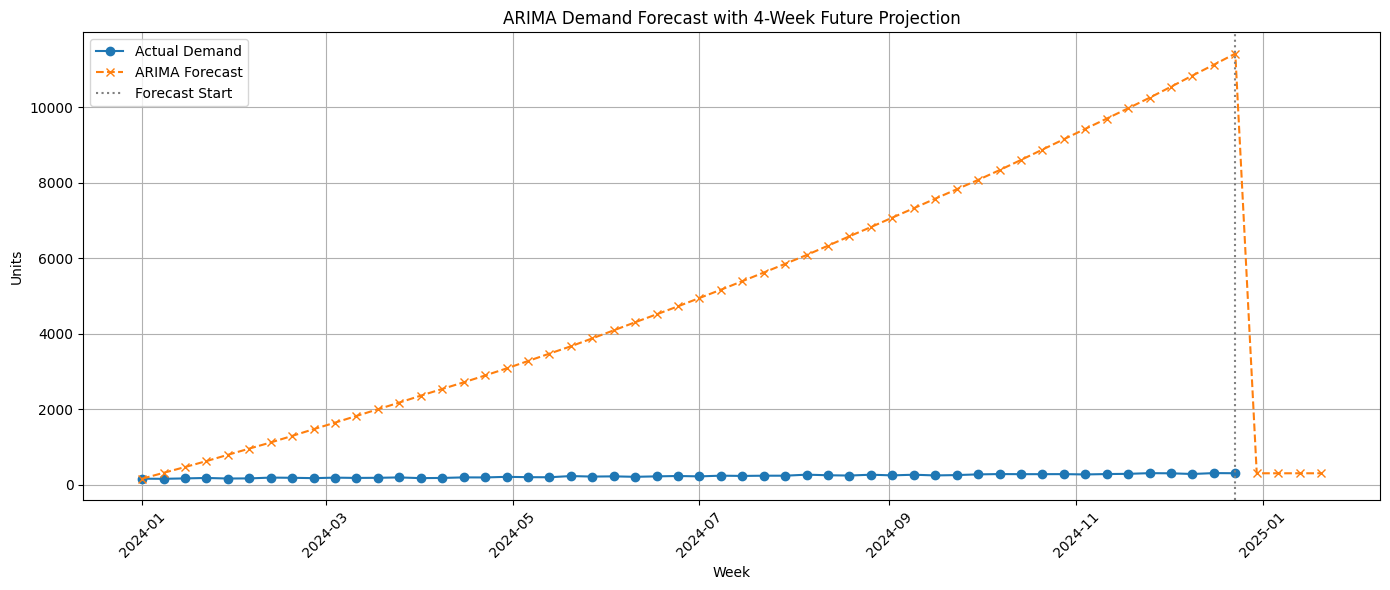

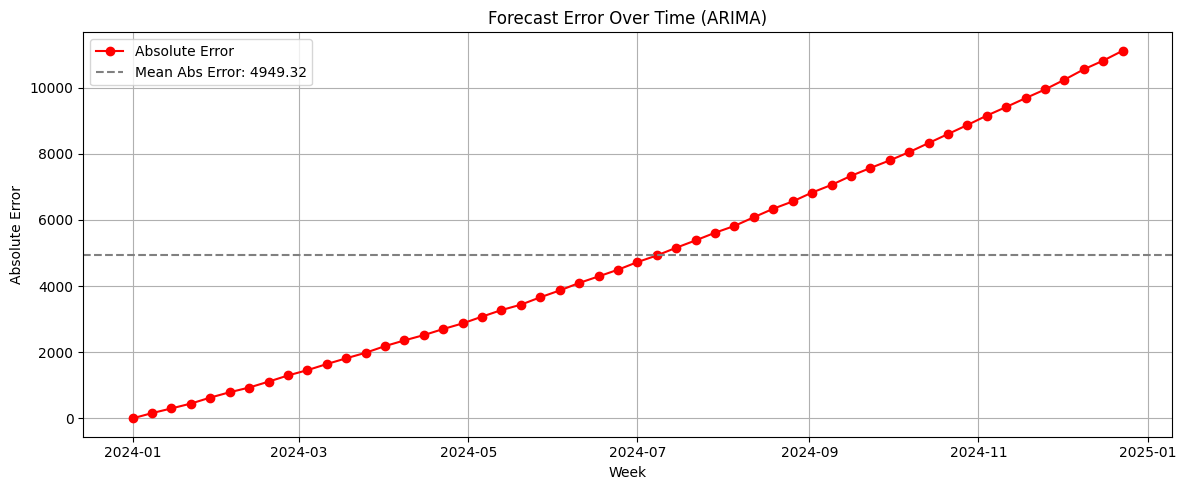

MAPE (Mean Absolute Percentage Error): 2002.81%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# Simulate weekly demand with a clear trend (no seasonality)
np.random.seed(42)
weeks = pd.date_range(start='2024-01-01', periods=52, freq='W-MON')
trend = np.arange(52) * 3
noise = np.random.normal(0, 10, 52)
demand = 150 + trend + noise

# Create dataframe
df = pd.DataFrame({'Week': weeks, 'Demand': demand})
df.set_index('Week', inplace=True)
df.index.freq = 'W-MON'

# Fit ARIMA model (we'll use (1,1,1) for simplicity — or use auto_arima if needed)
model = ARIMA(df['Demand'], order=(1,1,1))
model_fit = model.fit()

# In-sample fitted values
df['ARIMA_Fitted'] = model_fit.fittedvalues.cumsum() + df['Demand'].iloc[0]

# Forecast next 4 weeks
future_steps = 4
future_weeks = pd.date_range(start=df.index[-1] + pd.Timedelta(weeks=1), periods=future_steps, freq='W-MON')
forecast = model_fit.forecast(steps=future_steps)

future_df = pd.DataFrame({'Week': future_weeks, 'Demand': np.nan, 'ARIMA_Fitted': forecast})
future_df.set_index('Week', inplace=True)

# Combine historical + forecast
full_df = pd.concat([df, future_df])

# Plot actual and forecast
plt.figure(figsize=(14,6))
plt.plot(full_df.index, full_df['Demand'], label='Actual Demand', marker='o')
plt.plot(full_df.index, full_df['ARIMA_Fitted'], label='ARIMA Forecast', linestyle='--', marker='x')
plt.axvline(x=df.index[-1], color='gray', linestyle=':', label='Forecast Start')
plt.title('ARIMA Demand Forecast with 4-Week Future Projection')
plt.ylabel('Units')
plt.xlabel('Week')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📉 Forecast Error Plot (in-sample)
# --------------------------------------------
df_eval = df.copy()
df_eval['Error'] = df_eval['Demand'] - df_eval['ARIMA_Fitted']
df_eval['Abs_Error'] = abs(df_eval['Error'])

plt.figure(figsize=(12,5))
plt.plot(df_eval.index, df_eval['Abs_Error'], color='red', marker='o', label='Absolute Error')
plt.axhline(y=df_eval['Abs_Error'].mean(), color='gray', linestyle='--', label=f"Mean Abs Error: {df_eval['Abs_Error'].mean():.2f}")
plt.title("Forecast Error Over Time (ARIMA)")
plt.ylabel("Absolute Error")
plt.xlabel("Week")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📈 MAPE Evaluation
# --------------------------------------------
mape = mean_absolute_percentage_error(df['Demand'], df['ARIMA_Fitted'])
print(f"MAPE (Mean Absolute Percentage Error): {mape * 100:.2f}%")


# 📈 Project 4 – ARIMA Forecast for Trend-Based Demand

This project uses the ARIMA model (AutoRegressive Integrated Moving Average) to forecast weekly demand for a product with a clear trend but **minimal seasonality** — ideal for inventory planning and short-term demand predictions.

---

## 🏭 Industry Use Cases

### 🏬 1. Fashion Retail – New Collection Demand
- Forecasting demand for a new clothing line with rising interest (trend), but no historical seasonality.
- ARIMA models help stores replenish inventory for fast-moving SKUs without overcommitting.

### 🏢 2. Hardware or Furniture
- Predicting sales for new furniture designs with gradually increasing popularity.
- Demand rises with advertising or viral trends — captured by ARIMA.

### ⚙️ 3. Industrial Equipment Leasing
- Short-term forecasts for lease demand for power tools, forklifts, or generators.
- ARIMA captures the short-term trend driven by project cycles.

### 📦 4. B2B Consumables (e.g., printer ink, paper)
- Moderate growth in demand over weeks/months.
- No strong seasonal spikes, but consistent trends across clients.

---

## 🔧 Forecasting Technique: ARIMA

ARIMA models:
- Past **autocorrelation** (AR)
- Differencing (I) to remove trend
- **Moving averages** (MA) of past errors

Perfect when:
- Demand shows a consistent trend
- No significant seasonality
- Sufficient historical data

---

## 📊 What This Project Includes

- Simulated weekly demand (with upward trend)
- ARIMA model with automated parameter selection
- **4-week future forecast**
- **MAPE calculation** for forecast accuracy
- Forecast vs Actual + Error plots
